<a href="https://colab.research.google.com/github/Spamziesagcan/Exploratory-Data-Analysis/blob/main/Copy_of_BengaluruHouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/Bengaluru_House_Data.csv'
df = pd.read_csv(file_path)

Display top rows of the dataset.

In [ ]:

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Display bottom rows of the dataset.

In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


DATA PREPROCESSING:

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


In [ ]:
df.duplicated().sum()

529

In [ ]:
for i in df.columns:
  print(i,df[i].nunique())

area_type 4
availability 81
location 1305
size 31
society 2688
total_sqft 2117
bath 19
balcony 4
price 1994


Handling missing values.

In [ ]:
df = df.drop(columns=['society', 'balcony'])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df = df.dropna(subset=['size', 'bath'])

Represent 'size' as the number of bedrooms.

In [ ]:
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

Represent non numeric values as sqft.

In [ ]:
non_numeric_sqft = df[~df['total_sqft'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['total_sqft'].unique()
print("Non-numeric values in 'total_sqft':", non_numeric_sqft)


Non-numeric values in 'total_sqft': ['2100 - 2850' '3067 - 8156' '1042 - 1105' '1145 - 1340' '1015 - 1540'
 '34.46Sq. Meter' '1195 - 1440' '4125Perch' '1120 - 1145' '3090 - 5002'
 '1160 - 1195' '1000Sq. Meter' '1115 - 1130' '1100Sq. Yards' '520 - 645'
 '1000 - 1285' '650 - 665' '633 - 666' '5.31Acres' '30Acres' '1445 - 1455'
 '884 - 1116' '850 - 1093' '716Sq. Meter' '547.34 - 827.31' '580 - 650'
 '3425 - 3435' '1804 - 2273' '3630 - 3800' '4000 - 5249' '1500Sq. Meter'
 '142.61Sq. Meter' '1574Sq. Yards' '1250 - 1305' '670 - 980'
 '1005.03 - 1252.49' '1004 - 1204' '361.33Sq. Yards' '645 - 936'
 '2710 - 3360' '2830 - 2882' '596 - 804' '1255 - 1863' '1300 - 1405'
 '117Sq. Yards' '934 - 1437' '980 - 1030' '2249.81 - 4112.19'
 '1070 - 1315' '3040Sq. Meter' '500Sq. Yards' '2806 - 3019' '613 - 648'
 '704 - 730' '1210 - 1477' '3369 - 3464' '1125 - 1500' '167Sq. Meter'
 '1076 - 1199' '381 - 535' '524 - 894' '540 - 670' '315Sq. Yards'
 '2725 - 3250' '888 - 1290' '660 - 700' '385 - 440' '770 - 841'

In [ ]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            nums = x.split('-')
            return (float(nums[0]) + float(nums[1])) / 2
        return float(x)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])


Check if all column values are numeric.

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

<ipython-input-26-1a2c67c168b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')
<ipython-input-26-1a2c67c168b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath'] = pd.to_numeric(df['bath'], errors='coerce')


Function to remove outliers.

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Clear dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13201 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13201 non-null  object 
 1   availability  13201 non-null  object 
 2   location      13201 non-null  object 
 3   size          13201 non-null  int64  
 4   total_sqft    13201 non-null  float64
 5   bath          13201 non-null  float64
 6   price         13201 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 825.1+ KB


BASIC STATISTICAL ANALYSI:

Summaray statistics

In [ ]:
summary_stats = df.describe()
summary_stats

,size,total_sqft,bath,price
count,13201.000000,13201.000000,13201.000000,13201.000000
mean,2.800848,1555.306169,2.691160,112.274187
std,1.292796,1237.276637,1.338867,149.170520
min,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1275.000000,2.000000,71.890000
75%,3.000000,1672.000000,3.000000,120.000000
max,43.000000,52272.000000,40.000000,3600.000000


DATA VISUALIZATION:

Distribution of price:

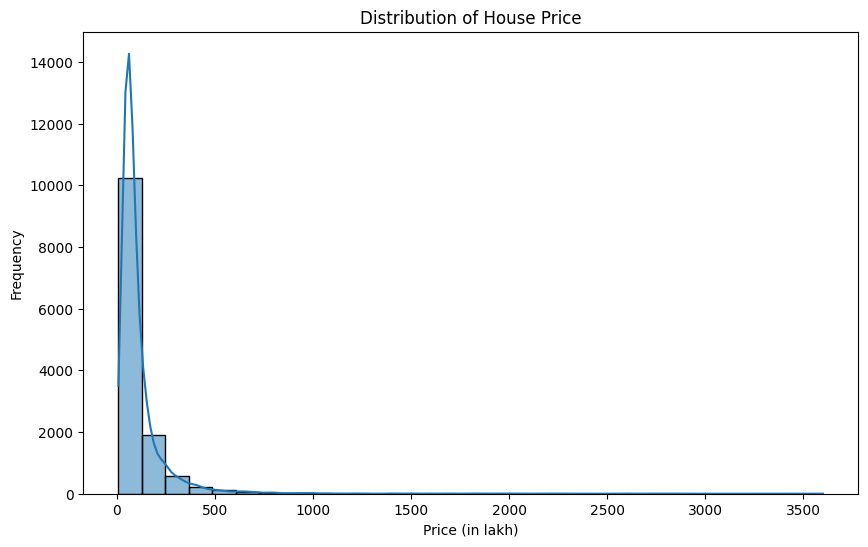

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Price')
plt.xlabel('Price (in lakh)')
plt.ylabel('Frequency')
plt.show()

Box plot of price per number of bedrooms.

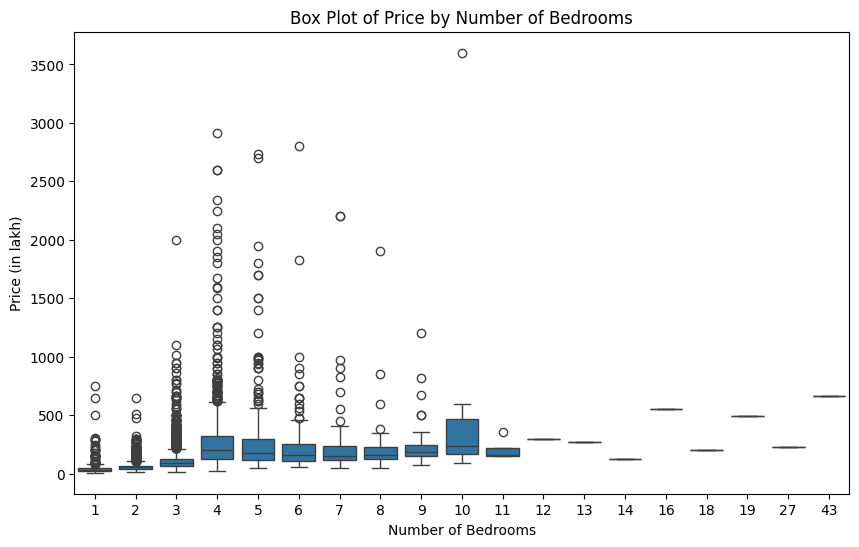

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='price', data=df)
plt.title('Box Plot of Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in lakh)')
plt.show()

Scatter plot of total sqft vs. price.

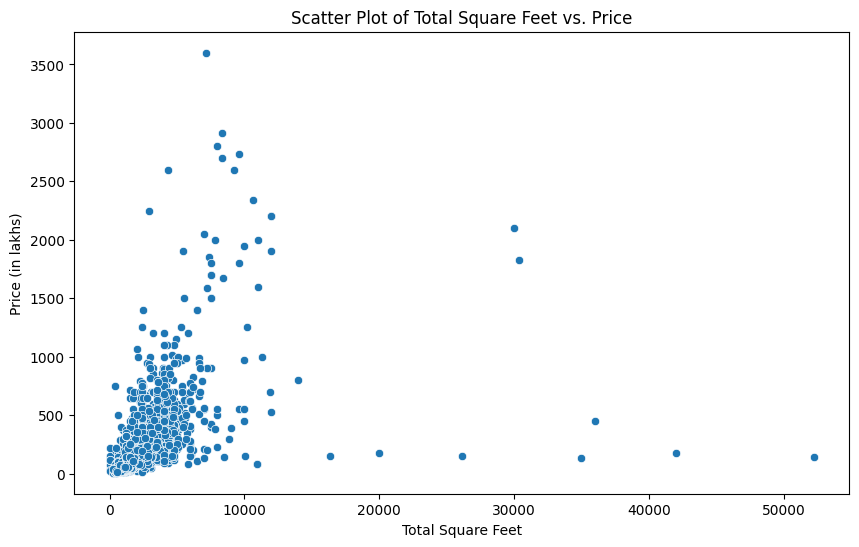

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot of Total Square Feet vs. Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in lakhs)')
plt.show()

Price distribution by location.

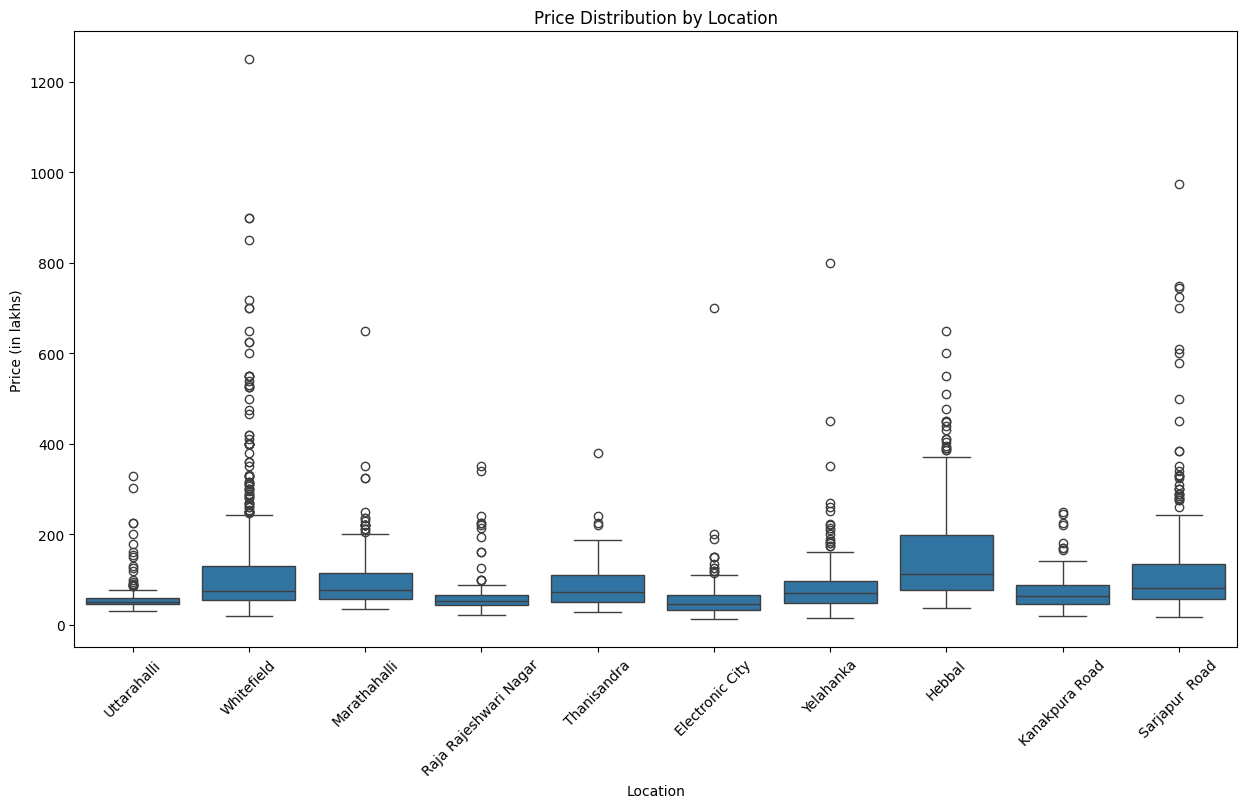

In [ ]:
plt.figure(figsize=(15, 8))
top_locations = df['location'].value_counts().nlargest(10).index
sns.boxplot(x='location', y='price', data=df[df['location'].isin(top_locations)])
plt.title('Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

Price per square foot distribution.

<ipython-input-37-961642c53fab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']


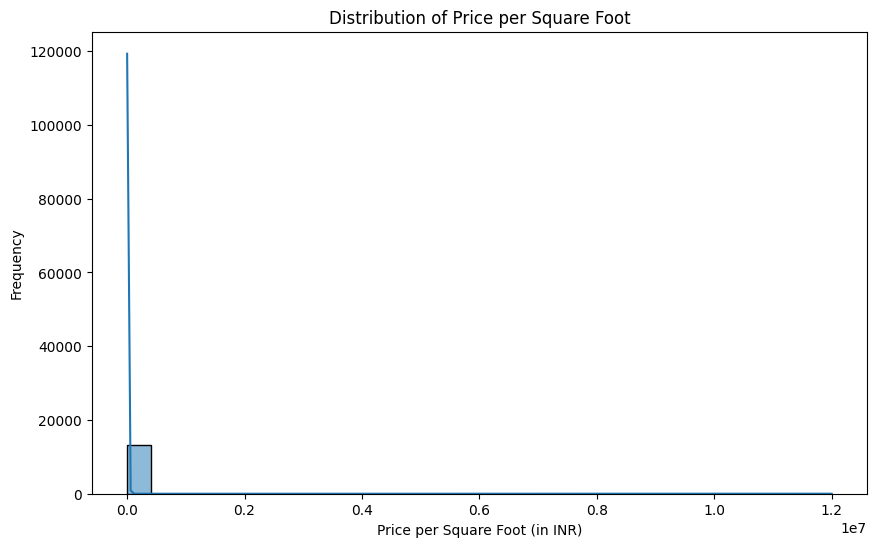

In [ ]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot (in INR)')
plt.ylabel('Frequency')
plt.show()

Price vs. number of bathrooms.

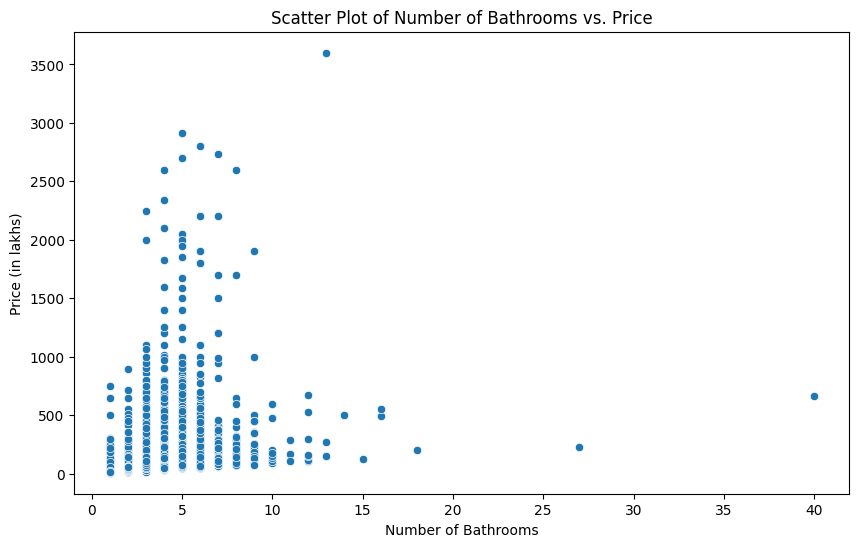

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bath', y='price', data=df)
plt.title('Scatter Plot of Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in lakhs)')
plt.show()

Pric vs. location.

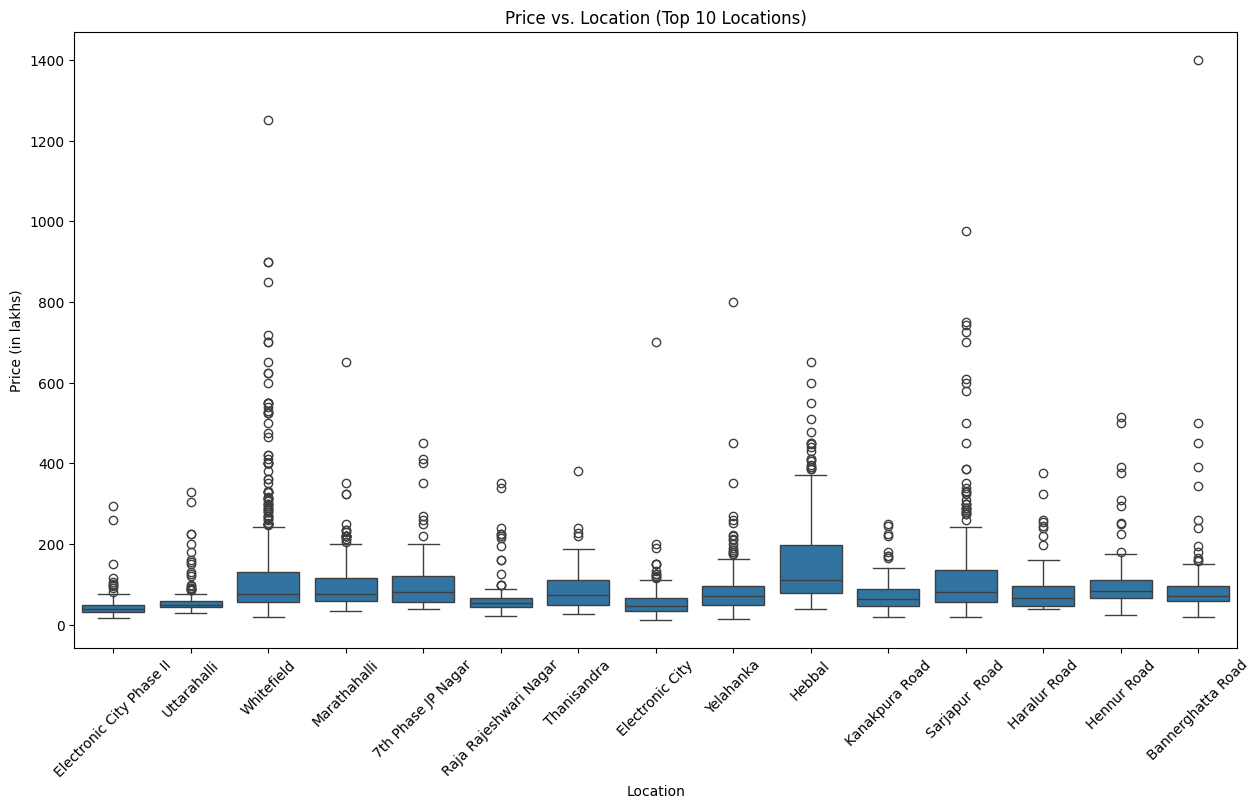

In [ ]:
plt.figure(figsize=(15, 8))
top_locations = df['location'].value_counts().nlargest(15).index
sns.boxplot(x='location', y='price', data=df[df['location'].isin(top_locations)])
plt.title('Price vs. Location (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

Price vs. size.

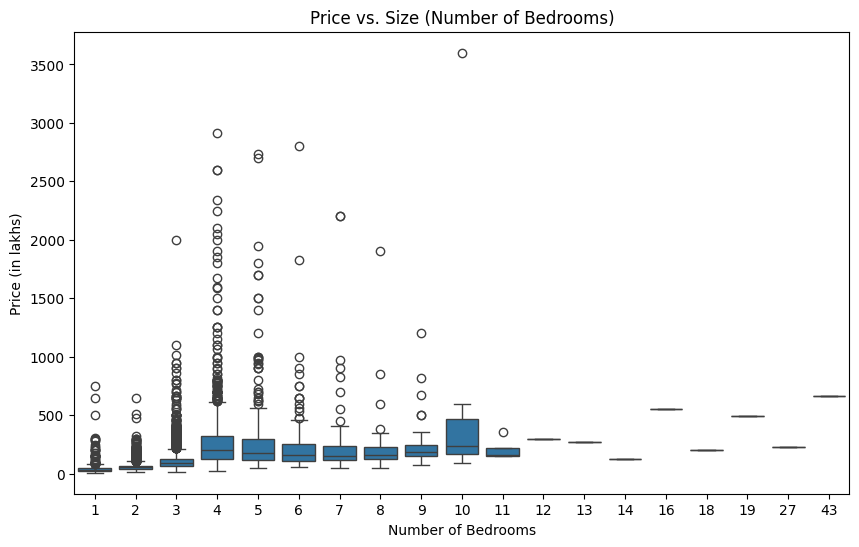

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='price', data=df)
plt.title('Price vs. Size (Number of Bedrooms)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in lakhs)')
plt.show()

Scatter plot of total sqft vs. price.

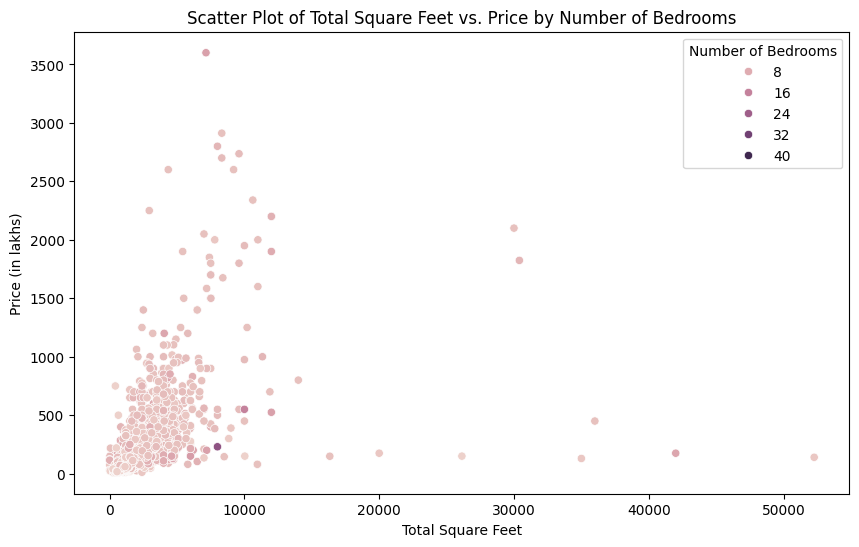

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', hue='size', data=df)
plt.title('Scatter Plot of Total Square Feet vs. Price by Number of Bedrooms')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in lakhs)')
plt.legend(title='Number of Bedrooms')
plt.show()

Bar plot:

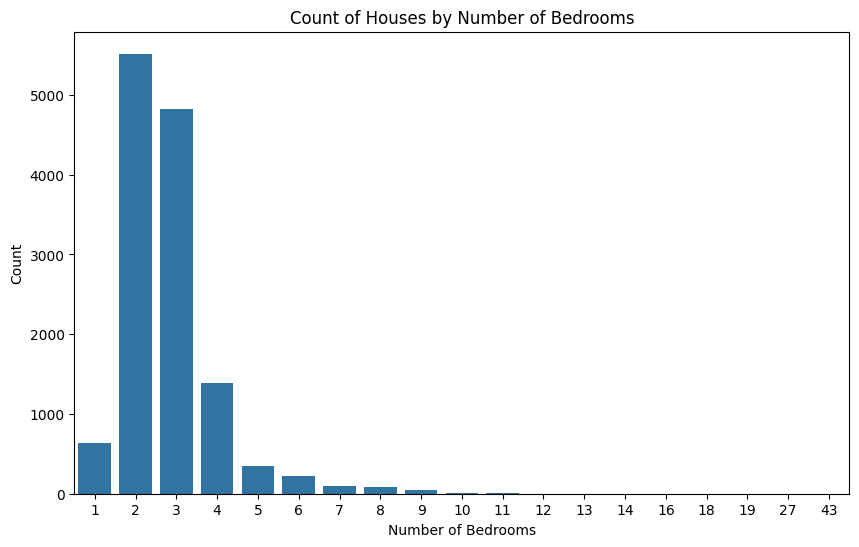

In [ ]:
# Bar plot of the count of houses by number of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='size', data=df)
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

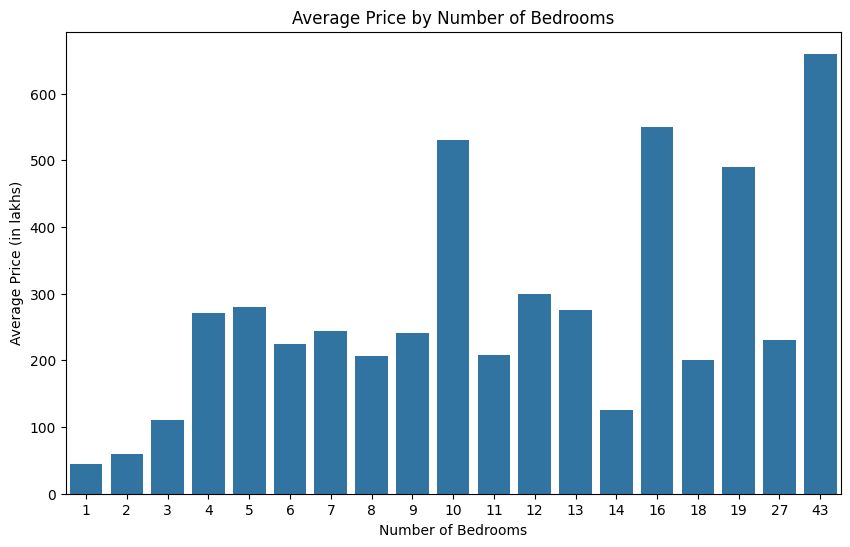

In [ ]:
# Bar plot of average price by number of bedrooms
plt.figure(figsize=(10, 6))
avg_price_by_size = df.groupby('size')['price'].mean().reset_index()
sns.barplot(x='size', y='price', data=avg_price_by_size)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (in lakhs)')
plt.show()

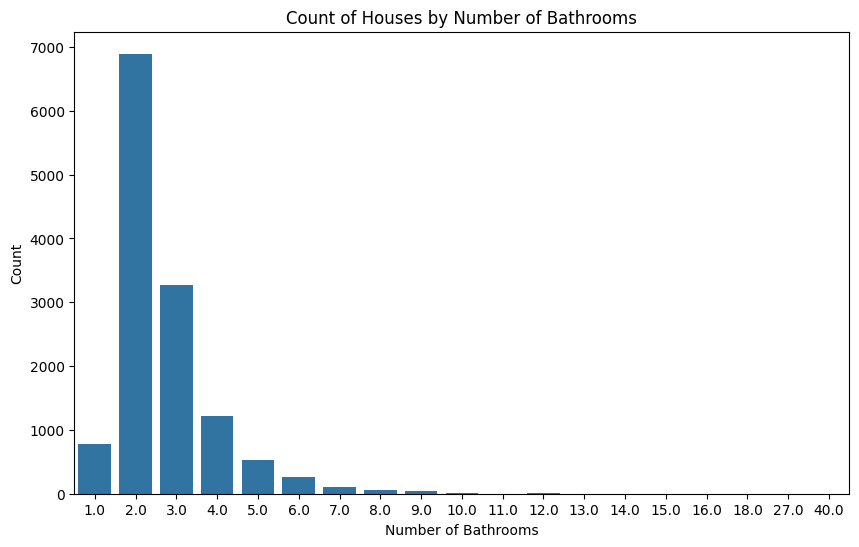

In [ ]:
# Bar plot of the count of houses by number of bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bath', data=df)
plt.title('Count of Houses by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

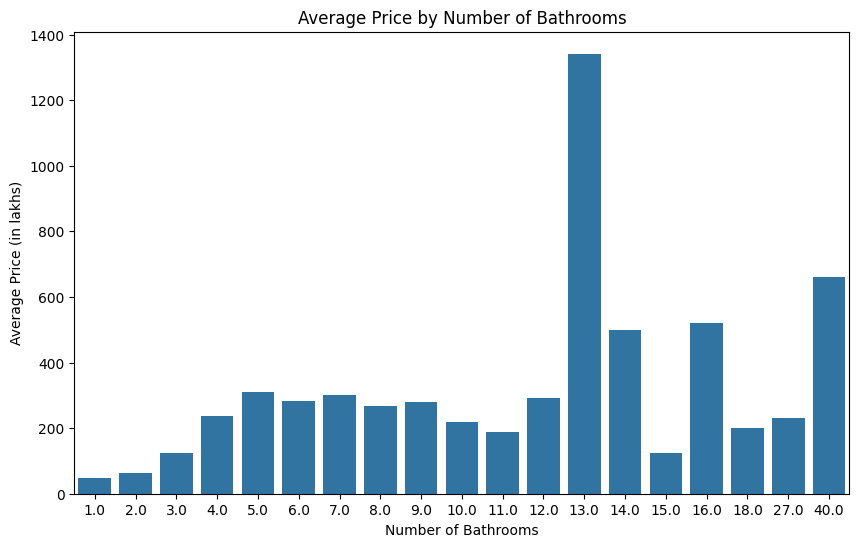

In [ ]:
# Bar plot of average price by number of bathrooms
plt.figure(figsize=(10, 6))
avg_price_by_bath = df.groupby('bath')['price'].mean().reset_index()
sns.barplot(x='bath', y='price', data=avg_price_by_bath)
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price (in lakhs)')
plt.show()

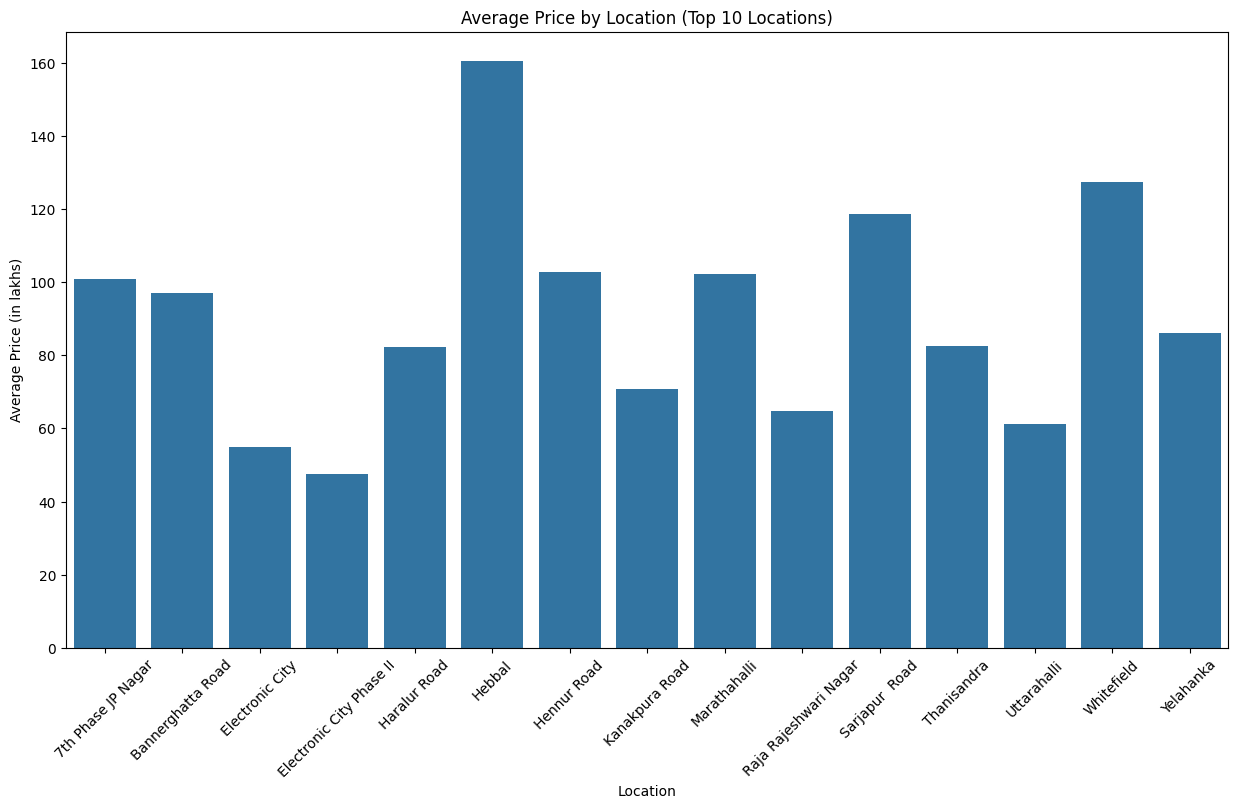

In [ ]:
# Bar plot of average price by location (Top 10 Locations)
plt.figure(figsize=(15, 8))
avg_price_by_location = df[df['location'].isin(top_locations)].groupby('location')['price'].mean().reset_index()
sns.barplot(x='location', y='price', data=avg_price_by_location)
plt.title('Average Price by Location (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Average Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

Vioin plots:

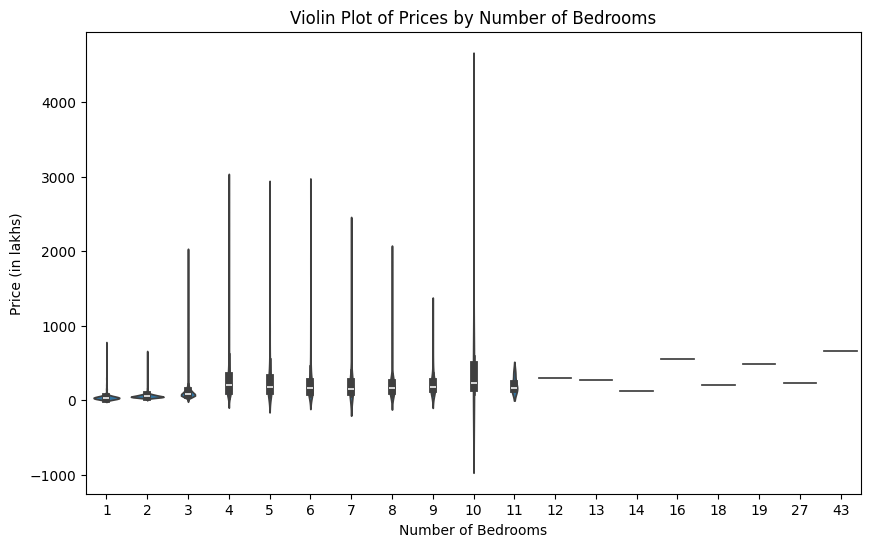

In [ ]:
# Violin plot of prices by number of bedrooms
plt.figure(figsize=(10, 6))
sns.violinplot(x='size', y='price', data=df)
plt.title('Violin Plot of Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in lakhs)')
plt.show()

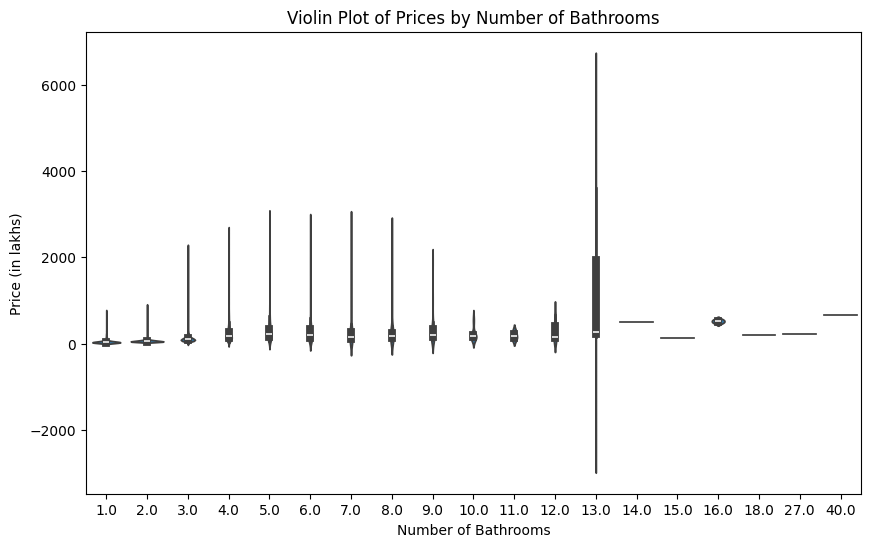

In [ ]:
# Violin plot of prices by number of bathrooms
plt.figure(figsize=(10, 6))
sns.violinplot(x='bath', y='price', data=df)
plt.title('Violin Plot of Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in lakhs)')
plt.show()

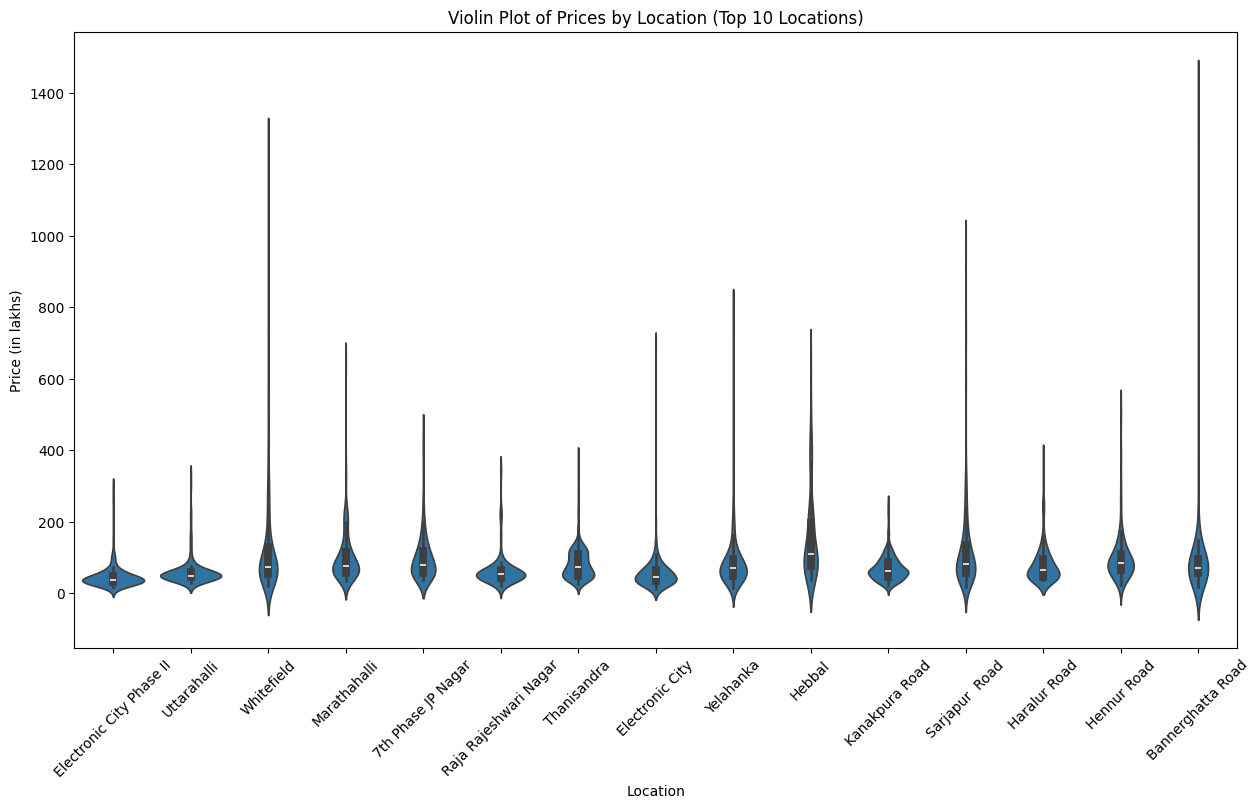

In [ ]:
# Violin plot of prices by location (Top 10 Locations)
plt.figure(figsize=(15, 8))
sns.violinplot(x='location', y='price', data=df[df['location'].isin(top_locations)])
plt.title('Violin Plot of Prices by Location (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

**Conclusion:**
1. Distribution of house prices: most of the house prices are concentrated in the lower range with some exceptions in the higher range.

2. Prices by number of bedrooms: Price is directly proportional to the number of bedrooms.

3. Total square feet vs. price: Price is directly proportional to total square feet with some exceptions depending on location.

4. Price per square foot: It varies significantly.

5. Price vs. location: Prices depend on location as per the preference of the population.

6. Price distribution by location: Houses near facilities are expensive compared to other locations.

7. Price vs. number of bathrooms: Price is directly proportional to the number of bathrooms.

8. Average price by number of bedrooms: Houses with higher number of bedrooms tend to have a higher average price.

9. Average price by location: Certain locations have higher average prices.

10. Violin plot: Violin plot shows the distribution of house prices on basis of different categories.